In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Create Synthetic data

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
n = int(3000)
# alpha1 = 0.666, alpha2 = -.333
alphas = np.array([.1])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
# # AR(2)
# ar2 = arma_generate_sample(ar=ar, ma=ma, nsample=n) 
# plt.figure(figsize=(20,5))
# plt.plot( ar2)

T_1 =  arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_2 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_3 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_4 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
T_5 = arma_generate_sample(ar=ar, ma=ma, nsample=n).reshape(-1,1)
M =[[1 , 0 , 0 , 0 , 1],
[0 , 1 , 0 , 0 , 1],
[0 , 0 , 1 , 0 , 1],
[0 , 0 , 0 , 1 , 1],
[1 , -1 , 0 , 0 , 1]]
delta = np.zeros((n,1))
delta_anomal = np.zeros((n,1))
delta_anomal[300:320]   = np.ones((20,1))
delta_anomal[600:610]   = np.full((10,1),-0.7)
delta_anomal[1300:1320] = np.full((20,1),2)
delta_anomal[2100:2150] = np.full((50,1),-1.5)

# delta_anomal[41:50] = np.ones((9,1))
N = np.concatenate((T_1,T_2,T_3,T_4,delta), axis=1)
N_anomal =  np.concatenate((T_1,T_2,T_3,T_4,delta_anomal), axis=1)
B = N@M
B_anomal = N_anomal@M

T_1 = B[:,0]
T_2 = B[:,1]
T_3 = B[:,2]
T_4 = B[:,3]
T_5 = B[:,4]


T_1_anomal = B_anomal[:,0]
T_2_anomal = B_anomal[:,1]
T_3_anomal = B_anomal[:,2]
T_4_anomal = B_anomal[:,3]
T_5_anomal = B_anomal[:,4]

MD_T = np.concatenate((T_1.reshape((-1,1)),T_2.reshape((-1,1)),T_3.reshape((-1,1)),T_4.reshape((-1,1)),T_5.reshape((-1,1))),axis=1)
MD_T_anomaly = np.concatenate((T_1_anomal.reshape((-1,1)),T_2_anomal.reshape((-1,1)),T_3_anomal.reshape((-1,1)),T_4_anomal.reshape((-1,1)),T_5_anomal.reshape((-1,1))),axis=1)
MD_T.shape,MD_T_anomaly.shape

labels = np.zeros((n,1))
labels[300:320]     = 1
labels[600:610]     = 1
labels[1300:1320]   = 1
labels[2100:2150]   = 1
df_synthetic = pd.DataFrame(np.concatenate((MD_T_anomaly,labels), axis = 1))
df_synthetic.columns =  np.r_[np.array(['V'+str(i) for i in range(1,6)]),['is_anomaly']]
df_synthetic

,V1,V2,V3,V4,V5,is_anomaly
0,-0.181775,-0.356005,-0.737091,-0.205435,-1.480306,0.0
1,0.111849,-0.726275,-0.385677,-0.715546,-1.715649,0.0
2,-1.371517,-0.564174,1.762981,0.583939,0.411228,0.0
3,1.215548,0.940304,1.203293,-0.545090,2.814054,0.0
4,0.565489,1.585782,1.605845,0.396074,4.153190,0.0
5,0.159889,-1.004514,0.386416,0.365448,-0.092762,0.0
6,-1.035256,0.087646,0.596977,2.013790,1.663157,0.0
7,-0.870609,0.907198,-0.555105,1.826035,1.307519,0.0
8,-1.186550,0.903166,-0.946299,-0.095505,-1.325189,0.0
9,-1.079154,0.494633,2.203691,-0.492293,1.126878,0.0


# MLP

In [89]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class MLP_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a.reshape(-1))
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)


    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):
        set_random_seed(42)
        seed(42)

        self.model = Sequential()
        self.model.add(Dense(300, activation='relu', input_dim=self.window_width*self.dimension))
        self.model.add(Dense(400, activation='relu'))
        self.model.add(Dense(200, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=1)

        self.plotTraining()

        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

        # xgb = XGBRegressor()
        # xgb.fit(self.train_X.reshape(-1,1),self.train_y.reshape(-1,1))

        # rmse = sqrt(mean_squared_error(self.test, self.predictions))
        # self.errors = np.absolute(self.test - np.array(self.predictions))
        # print('Prediction Test RMSE: %.3f' % rmse)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)
				
    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)        
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# # mlp = MLP_AnomalyDetection('drive/My Drive/MT/Experiments/Multivariate/NASA_Shuttle/40902.csv',100,9,30,0.3)
# mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3)
# mlp.fit()
# # mlp.plot()
# mlp.get_roc_auc(verbose=False)


In [0]:
0.46719427454831985

## Evaluation

### Mahalanobis

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Train on 798 samples, validate on 79 samples
Epoch 1/30
798/798 [==============================] - 22s 28ms/step - loss: 1.1077 - val_loss: 0.9955
Epoch 2/30
798/798 [==============================] - 0s 252us/step - loss: 0.6104 - val_loss: 1.0685
Epoch 3/30
798/798 [==============================] - 0s 246us/step - loss: 0.2988 - val_loss: 1.1171
Epoch 4/30
798/798 [==============================] - 0s 235us/step - loss: 0.1113 - val_loss: 1.1238
Epoch 5/30
798/798 [==============================] - 0s 241us/step - loss: 0.0476 - val_loss: 1.1320
Epoch 6/30
798/798 [==============================] - 0s 251us/step - loss: 0.0279 - val_loss: 1.1200
Epoch 7/30
798/798 [==============================] - 0s 249us/step - loss: 0.0223 - val_loss: 1.1215
Epoch 8/30
798/798 [==============================] - 0s 268us/step - loss: 0.0218 - val_loss: 1.1252
Epoch 9/30
798/798 [==============================] - 0s 247us/step - loss: 0.0180 - val_loss: 1.1349
Epoch 10/30
798/798 [================

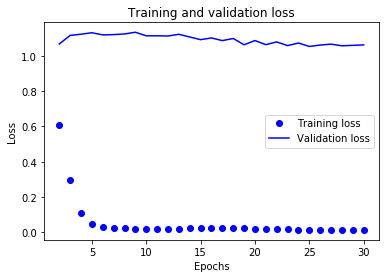

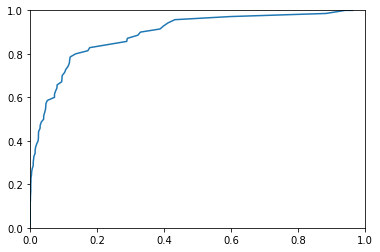

AUC:  0.8559486607142855
Time:  37


In [143]:
import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3,'mahalanobis')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Train on 798 samples, validate on 79 samples
Epoch 1/30
798/798 [==============================] - 4s 5ms/step - loss: 1.1239 - val_loss: 1.0200
Epoch 2/30
798/798 [==============================] - 0s 199us/step - loss: 0.6205 - val_loss: 1.1462
Epoch 3/30
798/798 [==============================] - 0s 200us/step - loss: 0.3025 - val_loss: 1.1949
Epoch 4/30
798/798 [==============================] - 0s 195us/step - loss: 0.1096 - val_loss: 1.2040
Epoch 5/30
798/798 [==============================] - 0s 191us/step - loss: 0.0454 - val_loss: 1.2283
Epoch 6/30
798/798 [==============================] - 0s 186us/step - loss: 0.0273 - val_loss: 1.1940
Epoch 7/30
798/798 [==============================] - 0s 185us/step - loss: 0.0205 - val_loss: 1.1989
Epoch 8/30
798/798 [==============================] - 0s 187us/step - loss: 0.0201 - val_loss: 1.2199
Epoch 9/30
798/798 [==============================] - 0s 191us/step - loss: 0.0197 - val_loss: 1.2012
Epoch 10/30
798/798 [==================

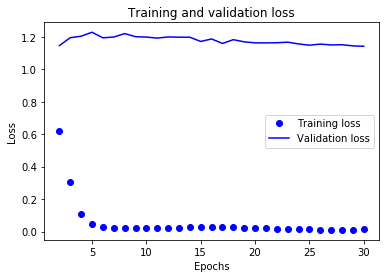

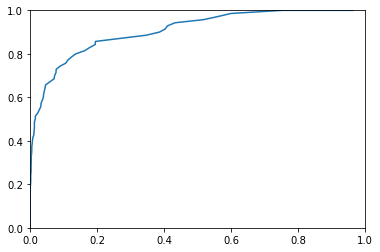

AUC:  0.8712016369047619
Time:  11


In [44]:
import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3,'mahalanobis')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

In [ ]:

import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40902.csv',None,100,9,10,0.3,'mahalanobis')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Train on 14627 samples, validate on 1462 samples
Epoch 1/10
14627/14627 [==============================] - 13s 882us/step - loss: 1.1327 - val_loss: 0.7145
Epoch 2/10
14627/14627 [==============================] - 4s 282us/step - loss: 1.1200 - val_loss: 0.7155
Epoch 3/10
14627/14627 [==============================] - 4s 281us/step - loss: 1.1050 - val_loss: 0.7173
Epoch 4/10
14627/14627 [==============================] - 4s 281us/step - loss: 1.0561 - val_loss: 0.7632
Epoch 5/10
14627/14627 [==============================] - 4s 281us/step - loss: 0.9777 - val_loss: 0.7452
Epoch 6/10
14627/14627 [==============================] - 4s 302us/step - loss: 0.8523 - val_loss: 0.7685
Epoch 7/10
 9408/14627 [==================>...........] - ETA: 1s - loss: 0.9106

### Euclidean

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Train on 798 samples, validate on 79 samples
Epoch 1/30
798/798 [==============================] - 4s 5ms/step - loss: 1.1239 - val_loss: 1.0200
Epoch 2/30
798/798 [==============================] - 0s 222us/step - loss: 0.6205 - val_loss: 1.1462
Epoch 3/30
798/798 [==============================] - 0s 326us/step - loss: 0.3025 - val_loss: 1.1949
Epoch 4/30
798/798 [==============================] - 0s 156us/step - loss: 0.1096 - val_loss: 1.2040
Epoch 5/30
798/798 [==============================] - 0s 179us/step - loss: 0.0454 - val_loss: 1.2283
Epoch 6/30
798/798 [==============================] - 0s 191us/step - loss: 0.0273 - val_loss: 1.1940
Epoch 7/30
798/798 [==============================] - 0s 186us/step - loss: 0.0205 - val_loss: 1.1989
Epoch 8/30
798/798 [==============================] - 0s 200us/step - loss: 0.0201 - val_loss: 1.2199
Epoch 9/30
798/798 [==============================] - 0s 191us/step - loss: 0.0197 - val_loss: 1.2012
Epoch 10/30
798/798 [==================

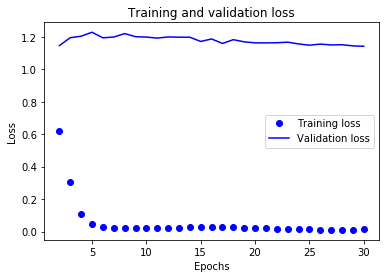

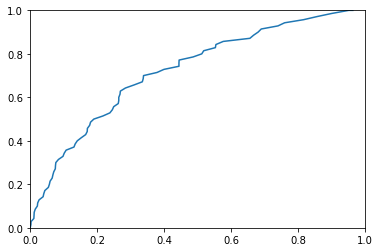

AUC:  0.6878906250000001
Time:  11


In [45]:
import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_DataFrame(df_synthetic,100,5,30,0.3,'euclidean')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Train on 28444 samples, validate on 2844 samples
Epoch 1/30
28444/28444 [==============================] - 8s 268us/step - loss: 1.5961 - val_loss: 0.3059
Epoch 2/30
28444/28444 [==============================] - 5s 173us/step - loss: 1.4237 - val_loss: 0.3037
Epoch 3/30
28444/28444 [==============================] - 5s 172us/step - loss: 1.4138 - val_loss: 0.2979
Epoch 4/30
28444/28444 [==============================] - 5s 172us/step - loss: 1.2980 - val_loss: 0.3079
Epoch 5/30
28444/28444 [==============================] - 5s 169us/step - loss: 1.2291 - val_loss: 0.3333
Epoch 6/30
28444/28444 [==============================] - 5s 172us/step - loss: 1.2106 - val_loss: 0.3116
Epoch 7/30
28444/28444 [==============================] - 5s 172us/step - loss: 1.0943 - val_loss: 0.3109
Epoch 8/30
28444/28444 [==============================] - 5s 170us/step - loss: 1.1414 - val_loss: 0.3088
Epoch 9/30
28444/28444 [==============================] - 5s 172us/step - loss: 1.0482 - val_loss: 0.32

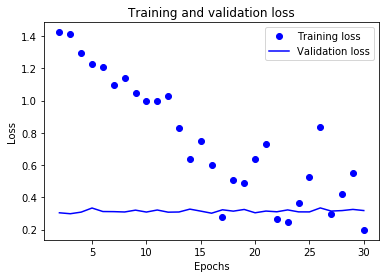

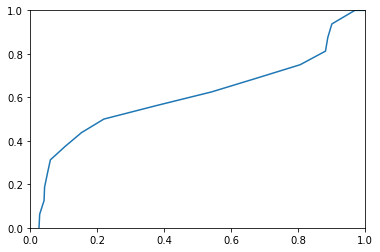

AUC:  0.6076916280530905
Time:  166


In [49]:

import datetime
startTime = datetime.datetime.now()
mlp = MLP_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv',None,100,3,30,0.3,'euclidean')
mlp.fit()
# mlp.plot()
mlp.get_roc_auc(verbose=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

# CNN

In [50]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense,distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):
        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()
        self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same'))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Flatten())
        self.model.add(Dense(self.n_dense, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation

### Mahalanobis

In [51]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.9225127872631653
Time:  15


In [52]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv',None,30,3,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.4890084617436606
Time:  141


### Euclidean

In [53]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7457243714429796
Time:  7


In [54]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv',None,30,3,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
histories.append(((f,k,d), hist))
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.5709200626098417
Time:  117


# CNN BatchNormalization

In [55]:
import scipy.linalg
from scipy.spatial import distance
import keras 
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten, Input, BatchNormalization, Activation
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_Batch_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten

        channel_pos = 'channels_first'
        inp_shape = Input((self.window_width,self.dimension),name='input1')
        x = Conv1D(self.n_filters[0], kernel_size=self.kernel_size, padding = 'same', input_shape=(self.window_width,self.dimension),data_format=channel_pos,name='conv2d_Prep')(inp_shape)
        x = BatchNormalization(axis=1,name='batch_normalization_prep')(x)
        x_a1 = Activation('relu',name='activation_prep')(x)
        activated_x = x_a1

        #     activated_x, x
        nr = 1 *2 -1
        x = Conv1D(self.n_filters[1], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr), padding='same',data_format=channel_pos)(activated_x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr))(x)
        activated_x = Activation('relu',name='activation_'+str(nr+1))(x)
        activated_x = Flatten()(activated_x)
 
        activated_x = Dense(self.n_dense)(activated_x)
        output = Dense(self.dimension)(activated_x)

        from keras.models import Model
        self.model = Model(inp_shape,output )

        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation

### Mahalanobis

In [56]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.9118507312153304
Time:  11


In [57]:

import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,20,0.3,[8,8,8],2,18, 'mahalanobis')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.7102951214536781
Time:  151


### Euclidean

In [58]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7545565881420647
Time:  10


In [59]:

import datetime
startTime = datetime.datetime.now()
cnn = CNN_Batch_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,20,0.3,[8,8,8],2,18, 'euclidean')
hist = cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

AUC:  0.5494136211712277
Time:  158


# Resnet

In [60]:
import scipy.linalg
from scipy.spatial import distance
import keras 
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten, Input, BatchNormalization, Activation
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class CNN_Resnet_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):
        self.distance_function =  distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self, plot = False):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores(plot = plot)
        self.inverse_standardize_dataframe()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self, plot = False):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten

        channel_pos = 'channels_first'
        inp_shape = Input((self.window_width,self.dimension),name='input1')
        x = Conv1D(self.n_filters[0], kernel_size=self.kernel_size, padding = 'same', input_shape=(self.window_width,self.dimension),data_format=channel_pos,name='conv2d_Prep')(inp_shape)
        x = BatchNormalization(axis=1,name='batch_normalization_prep')(x)
        x_a1 = Activation('relu',name='activation_prep')(x)
        activated_x = x_a1

        #     activated_x, x
        nr = 1 *2 -1
        x = Conv1D(self.n_filters[1], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr), padding='same',data_format=channel_pos)(activated_x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr))(x)
        x = Activation('relu',name = 'activation_'+str(nr))(x)
        x = Conv1D(self.n_filters[2], kernel_size=self.kernel_size, name = 'conv2d_'+str(nr+1),padding = 'same',data_format=channel_pos)(x)
        x = BatchNormalization(axis=1, name = 'batch_normalization_'+str(nr+1))(x)
        x = keras.layers.add([x,activated_x],name='add_' + str(1))
        activated_x = Activation('relu',name='activation_'+str(nr+1))(x)
        activated_x = Flatten()(activated_x)
        activated_x = Dense(self.n_dense)(activated_x)
        output = Dense(self.dimension)(activated_x)

        from keras.models import Model
        self.model = Model(inp_shape,output )

        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        if plot:
            self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8], [4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break
# print(best_auc)

## Evaluation


### Mahalanobis

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


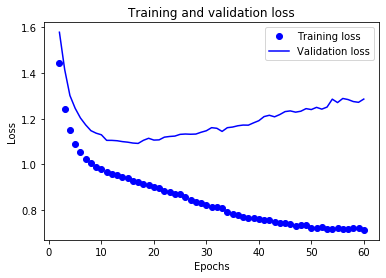

AUC:  0.9297503092145949
Time:  21


In [61]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,180,5,60,0.3,[3,3,3],1,18,'mahalanobis')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

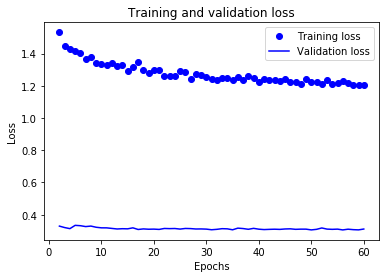

AUC:  0.5737006234962968
Time:  578


In [62]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,180,3,60,0.3,[3,3,3],1,18,'mahalanobis')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


### Euclidean

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


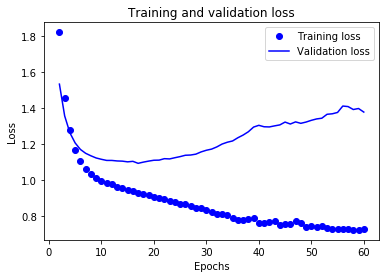

AUC:  0.7051484230055659
Time:  25


In [63]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,180,5,60,0.3,[3,3,3],1,18,'euclidean')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)
#0.757626

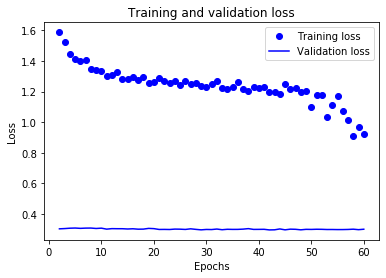

AUC:  0.4976142224773167
Time:  597


In [65]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,180,3,60,0.3,[3,3,3],1,18,'euclidean')
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


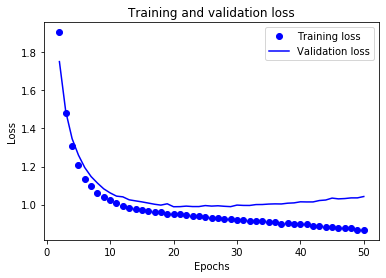

AUC:  0.7602232142857143
Time:  26


In [29]:
import datetime
startTime = datetime.datetime.now()
cnn = CNN_Resnet_AnomalyDetection.from_DataFrame(df_synthetic,100,5,50,0.3,[4,4,4],1,18)
hist = cnn.fit(plot=True)
histories.append(((f,k,d), hist))
auc = cnn.get_roc_auc(verbose=False,plot=False)
endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)


# Wavenet

In [66]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class WaveNet_AnomalyDetection:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function) -> 'XGB_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, kernel_size, n_dense, distance_function):

        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.n_dense = n_dense

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()

        return self.history.history

    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same', dilation_rate=1))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate=2))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 4))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Conv1D(filters=self.n_filters[3], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 8))
        self.model.add(MaxPooling1D(pool_size=2))

        self.model.add(Flatten())
        self.model.add(Dense(self.n_dense, activation='relu'))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X)
        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)


    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def get_roc_auc(self, plot=True, verbose=True):
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,f,k,d)
#             hist = cnn.fit()
#             histories.append(((f,k,d), hist))
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation 

### Mahalanobis

In [67]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8,8],2,18, 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.9387544125063035
Time:  11


In [68]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,20,0.3,[8,8,8,8],2,18, 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

AUC:  0.6460911020273663
Time:  149


### Euclidean

In [69]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_DataFrame(df_synthetic,30,5,20,0.3,[8,8,8,8],2,18, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AUC:  0.7364923276421009
Time:  12


In [70]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = WaveNet_AnomalyDetection.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,20,0.3,[8,8,8,8],2,18, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

AUC:  0.5178404704368567
Time:  150


# LSTM

In [71]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class LSTM_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function):

        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        self.distance_function = distance_function

        self.n_filters = n_filters

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        import datetime
        startTime = datetime.datetime.now()

        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        self.model = Sequential()
        self.model.add(LSTM(self.n_filters[0], batch_input_shape=(1, self.window_width, self.dimension), stateful=True, return_sequences=True))
        self.model.add(LSTM(self.n_filters[1], batch_input_shape=(1, self.window_width, self.dimension), stateful=True))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        for i in range(self.n_epochs):
            print('Epoch',i, '/',self.n_epochs)
            self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, batch_size=1, verbose=1, shuffle=False)
            self.model.reset_states()
        # self.history =self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, verbose=2)
        
        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)

        endTime = datetime.datetime.now()
        diff = endTime - startTime
        print('Train and Test time: ',diff.seconds)

        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   
    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,f)
#             cnn.fit()
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation

### Mahalanobis

In [74]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 89s 103ms/step - loss: 0.9879
Train and Test time:  162
AUC:  0.9329551185073122
Time:  162.393739


In [75]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

Epoch 0 / 1
Epoch 1/1
28514/28514 [==============================] - 2549s 89ms/step - loss: 1.5927
Train and Test time:  4672
AUC:  0.4045405865553603
Time:  4673.839763


### Euclidean

In [76]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 89s 102ms/step - loss: 0.9829
Train and Test time:  164
AUC:  0.7309739932281537
Time:  164.446388


In [77]:
import datetime
startTime = datetime.datetime.now()
import glob

cnn = LSTM_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

Epoch 0 / 1
Epoch 1/1
28514/28514 [==============================] - 2573s 90ms/step - loss: 1.5887
Train and Test time:  4605
AUC:  0.487959079996234
Time:  4607.232518


# GRU

In [ ]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers

def warn(*args, **kwargs):
    pass
    
class GRU_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, n_filters, distance_function) -> 'LSTM_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, n_filters, distance_function):

        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        self.distance_function = distance_function
        self.n_filters = n_filters

        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()

        # self.model.add(Conv1D(filters=self.n_filters[0], kernel_size=self.kernel_size, activation='relu', input_shape=(self.window_width,self.dimension ),data_format='channels_first', padding='same', dilation_rate=1))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[1], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate=2))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[2], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 4))
        # self.model.add(MaxPooling1D(pool_size=2))
        # self.model.add(Conv1D(filters=self.n_filters[3], kernel_size=self.kernel_size, activation='relu',data_format='channels_first', padding='same', dilation_rate = 8))
        # self.model.add(MaxPooling1D(pool_size=2))

        # self.model.add(Flatten())
        # self.model.add(Dense(self.n_dense, activation='relu'))
        # self.model.add(Dense(self.dimension))
        # self.model.compile(optimizer='adam', loss='mse')
        # self.history = self.model.fit(self.train_X, self.train_y,validation_data=(self.val_X,self.val_y), epochs=self.n_epochs, verbose=0)
        import datetime
        startTime = datetime.datetime.now()

        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        self.model = Sequential()
        self.model.add(GRU(self.n_filters[0], batch_input_shape=(1, self.window_width, self.dimension), stateful=True, return_sequences=True))
        self.model.add(GRU(self.n_filters[1], batch_input_shape=(1, self.window_width, self.dimension), stateful=True))
        self.model.add(Dense(self.dimension))
        self.model.compile(optimizer='adam', loss='mse')
        for i in range(self.n_epochs):
            print('Epoch',i, '/',self.n_epochs)
            self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, batch_size=1, verbose=1, shuffle=False)
            self.model.reset_states()
        # self.history =self.model.fit(self.train_X, self.train_y, epochs=self.n_epochs, verbose=2)
        
        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)

        endTime = datetime.datetime.now()
        diff = endTime - startTime
        print('Train and Test time: ',diff.seconds)

        self.error_vect = (self.test_y.reshape(self.predictions.shape) - self.predictions).reshape(self.test_y.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   
    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def get_roc_auc(self, plot=True, verbose=True):

        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = LSTM_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,f)
#             cnn.fit()
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation

### Mahalanobis

In [78]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 69s 79ms/step - loss: 0.9978
Train and Test time:  133
AUC:  0.9332504862762049
Time:  133.816162


In [79]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'mahalanobis')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

Epoch 0 / 1
Epoch 1/1
28514/28514 [==============================] - 2064s 72ms/step - loss: 1.5834
Train and Test time:  3855
AUC:  0.5382788962465478
Time:  3856.191389


### Euclidean

In [80]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

C:\Users\MoBray\.conda\envs\TensorFlow_GPU_Keras\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Epoch 0 / 1
Epoch 1/1
868/868 [==============================] - 69s 79ms/step - loss: 0.9958
Train and Test time:  132
AUC:  0.7467473524962177
Time:  132.870664


In [81]:
import datetime
startTime = datetime.datetime.now()

cnn = GRU_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3,[8,8,8,8], 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

Epoch 0 / 1
Epoch 1/1
28514/28514 [==============================] - 2069s 73ms/step - loss: 1.5938
Train and Test time:  3873
AUC:  0.49810375737509416
Time:  3874.948258


# Autoencoder

In [17]:
import scipy.linalg
from scipy.spatial import distance
import warnings
from sklearn.cluster import KMeans
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import read_csv
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np 
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn import preprocessing
import sys
from tensorflow import set_random_seed
set_random_seed(42)
from numpy.random import seed
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import Conv1D,MaxPooling1D,Flatten
seed(42)
from keras import regularizers, Model

def warn(*args, **kwargs):
    pass
    
class AutoEncoder_AnomalyDetection_ML:
    @classmethod
    def from_DataFrame(cls,dataframe,window_width, dimension, n_epochs, train_rate, distance_function, filters) -> 'AutoEncoder_AnomalyDetection_ML':
    	return cls(dataframe, window_width, dimension, n_epochs, train_rate, distance_function, filters)

    @classmethod
    def from_file(cls, path, index_col, window_width, dimension,n_epochs, train_rate, distance_function, filters) -> 'AutoEncoder_AnomalyDetection_ML':
    	df = read_csv(path, header=0, index_col=index_col, parse_dates=True,squeeze=True)
    	return cls(df, window_width, dimension, n_epochs, train_rate, distance_function, filters)
     
    def __init__(self,df, window_width, dimension, n_epochs, train_rate, distance_function, filters):
        self.filters = filters
        self.distance_function = distance_function
        self.dimension = dimension
        self.n_epochs = n_epochs
        self.window_width = window_width
        
        self.df = df
        self.df = self.df.reset_index(drop=True)
        self.df.rename(columns={'Target':'is_anomaly'}, inplace=True)
        self.df.loc[self.df.is_anomaly == "'Anomaly'", 'is_anomaly'] = 1
        self.df.loc[self.df.is_anomaly == "'Normal'", 'is_anomaly'] = 0

        df_sensors = pd.DataFrame(self.df.iloc[:,:dimension].values)  
        self.values = df_sensors
        self.dataframe = concat([self.df.iloc[:,:-1].shift(1), self.df.iloc[:,:-1], self.df.iloc[:,-1]], axis=1)
        self.dataframe.columns = np.r_[np.array(['V'+str(i)+'_t' for i in range(1,self.dimension+1)]),np.array(['V'+str(i)+'_t+1' for i in range(1,self.dimension+1)]),['is_anomaly']]

        # self.dataframe = concat([self.values.shift(1), self.values], axis=1)
        # self.dataframe.columns = ['t', 't+1']

        self.train_size = int(len(self.values) * train_rate)  


    def create_XY_lookback_dataset(self,dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back),:self.dimension]
            dataX.append(a)
            dataY.append(dataset[i + look_back,:self.dimension].reshape(-1))
        return numpy.array(dataX), numpy.array(dataY)
    
    def getWindowedVectors(self, X):
        vectors = np.zeros((len(X) - self.window_width+1,self.window_width))
        for i,_ in enumerate(X[:-self.window_width+1]):
            vectors[i] = X[i:i+self.window_width]
        return vectors

    def __build_sets(self):

        X = self.dataframe.iloc[:,:-1].values
        self.train, self.test = X[1:self.train_size], X[self.train_size:]    
        # print('Train.len:',len(self.train),' - Test.len:', len(self.test))

        self.train_X, self.train_y = self.create_XY_lookback_dataset(self.train, self.window_width)
        self.test_X, self.test_y = self.create_XY_lookback_dataset(self.test, self.window_width)
        # print('TrainX.shape:',self.train_X.shape,' - TestX.shape:', self.test_X.shape,' - TrainY.shape:', self.train_y.shape,' - TestY.shape:', self.test_y.shape)

        self.validationsize = int(self.train_X.shape[0] * 0.1)
        self.val, self.test = self.test[:self.validationsize], self.test[self.validationsize:]
        self.val_X, self.val_y= self.test_X[:self.validationsize], self.test_y[:self.validationsize]
        self.test_X, self.test_y = self.test_X[self.validationsize:], self.test_y[self.validationsize:]

    def standardize_dataframe(self):
        X = self.dataframe.values
        self.scalar = preprocessing.StandardScaler().fit(X)
        X = self.scalar.transform(X)
        self.dataframe = pd.DataFrame(X)

    def inverse_standardize_dataframe(self):
        X = self.dataframe.values
        X = self.scalar.inverse_transform(X)
        self.dataframe = pd.DataFrame(X)



    def model_persistence(self, x):
        return x
        
    def create_persistence(self):
        rmse = sqrt(mean_squared_error(self.dataframe.iloc[self.train_size:,:self.dimension], self.dataframe.iloc[self.train_size:,self.dimension:-1]))
        # print('Persistent Model RMSE: %.3f' % rmse)   

    def fit(self):
        self.create_persistence()
        self.standardize_dataframe()
        self.__build_sets()
                
        self.compute_anomalyScores()
        self.inverse_standardize_dataframe()
        # self.compute_Errors_RMSE()


    def plotTraining(self):
        history_dict = self.history.history
        loss_values = history_dict['loss'][1:]
        val_loss_values = history_dict['val_loss'][1:]
        self.n_epochs = range(2, self.n_epochs + 1)
        plt.plot(self.n_epochs, loss_values, 'bo', label='Training loss')
        plt.plot(self.n_epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def compute_anomalyScores(self):

        # self.train_X = numpy.reshape(self.train_X, (self.train_X.shape[0],self.dimension,self.train_X.shape[1]))
        # self.test_X = numpy.reshape(self.test_X, (self.test_X.shape[0],self.dimension, self.test_X.shape[1]))

        from keras.layers import Conv1D,MaxPooling1D,Flatten
        self.model = Sequential()


        self.train_X = numpy.reshape(self.train_X, (-1, self.window_width, self.dimension))
        self.test_X = numpy.reshape(self.test_X, (-1, self.window_width, self.dimension))

        input_layer = Input(shape=( self.window_width, self.dimension))
        encoder = Dense(self.filters[0], activation="relu")(input_layer)
        encoder = Dense(self.filters[1], activation="relu")(encoder)
        decoder = Dense(self.filters[1], activation="relu")(encoder)
        decoder = Dense(self.filters[0], activation="relu")(decoder)
        decoder = Dense(self.dimension, activation="linear")(decoder)
        self.model = Model(inputs=input_layer, outputs=decoder)
        
        self.model.compile(metrics=['accuracy'],
                            loss='mean_squared_error',
                            optimizer='adam')
        channel_pos = 'channels_first'


        history = self.model.fit(self.train_X, self.train_X, epochs=self.n_epochs, verbose=2)

        # self.plotTraining()
        self.predictions = self.model.predict(self.test_X, batch_size = 1)
        self.error_vect = (self.test_X.reshape(self.predictions.shape) - self.predictions).reshape(self.test_X.shape[0],-1)
        self.compute_errors(self.distance_function)

    def compute_Errors_RMSE(self):

        rmse = sqrt(mean_squared_error(self.test_y.reshape(self.predictions.shape), self.predictions))
        self.errors = np.absolute(self.test_y.reshape(self.predictions.shape) - np.array(self.predictions))
        # print('Prediction Test RMS        E: %.3f' % rmse)       
   

    def plot(self):
        fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(50,5))
        for i, ax in enumerate(axes.flatten()):
            data = self.df[self.df.columns[i]].iloc[:200]
            ax.plot(self.test_y[:,i], color='green',  linewidth=0.5,label='True Values')
            ax.plot(self.predictions[:,i], color='blue',  linewidth=0.5,label='Predictions')
            ax.plot(self.errors[:,i], color = 'red',  linewidth=0.5, label='Errors')
            ax.legend()
            
        plt.show()

    def compute_errors(self, distance_function):
        if distance_function == 'mahalanobis':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.mahalanobis(error,mean,inv_cov)
        elif distance_function == 'euclidean':
            inv_cov = scipy.linalg.inv(np.cov(self.error_vect.T))
            mean = np.mean(self.error_vect,axis=0)
            self.errors = np.zeros((len(self.error_vect),1))
            for i,error in enumerate(self.error_vect):
                self.errors[i] = distance.euclidean(error,mean)
                
    def get_roc_auc(self, plot=True, verbose=True):
        # self.euclidean_errors = numpy.linalg.norm((self.test_X.reshape(self.predictions.shape) - self.predictions).reshape(self.test_X.shape[0],-1), axis=1)
        # get the predicted errors of the anomaly points
        indices = self.df[self.df['is_anomaly']==1].index >self.train_size + self.validationsize
        true_anomaly_predicted_errors = self.errors[self.df[self.df['is_anomaly']==1].index[indices] - self.train_size - self.validationsize - self.window_width -1]
        if len(true_anomaly_predicted_errors) == 0:
            return np.nan
        # sort them 
        true_anomaly_predicted_errors = np.sort(true_anomaly_predicted_errors,axis=0).reshape(-1)
        true_anomaly_predicted_errors_extended = np.r_[np.linspace(0,true_anomaly_predicted_errors[0],40)[:-1],true_anomaly_predicted_errors]
        true_anomaly_predicted_errors_extended = np.r_[true_anomaly_predicted_errors_extended, true_anomaly_predicted_errors_extended[-1] + np.mean(true_anomaly_predicted_errors_extended)]
                # now iterate thru the predicted errors from small to big
        # for each value look how much other points have equal or bigger error
        FPR = [] # fp/n  https://en.wikipedia.org/wiki/Sensitivity_and_specificity
        TPR = [] # tp/p
        p = len(true_anomaly_predicted_errors)
        Thresholds = []
        for predictederror in true_anomaly_predicted_errors_extended:
            threshold = predictederror
            tp = len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>= threshold])
            fp = len(self.errors[self.errors>=threshold])-len(true_anomaly_predicted_errors[true_anomaly_predicted_errors>=threshold])
            
            fpr =fp/len(self.errors)
            FPR.append(fpr)
            TPR.append(tp/p)
            if verbose:
                print("Threshold: {0:25}  - FP: {1:4} - TP: {2:4} - FPR: {3:21} - TPR: {4:4}".format(threshold,fp, tp, fpr, tp/p))

        import matplotlib.pyplot as plt
        if plot:
            plt.figure()
            plt.axis([0, 1, 0, 1])
            plt.plot(FPR,TPR)
            plt.show() 

        # This is the AUC
        from sklearn.metrics import auc
        print('AUC: ' ,auc(FPR,TPR)        )
        return auc(FPR,TPR)

# filters = [[8,8,8,8], [4,4,4,4], [4,8,16], [4,8,12], [16,32,48], [128,128,128],[64,64,64],[256,256,256],[128,256,512]]
# kernelsizes = [2,3,4,6,8,16]
# dense = [18,36,72,144]

# best_auc = [0,0]
# histories = []
# for f in filters:
#     for k in kernelsizes:
#         for d in dense:

#             cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'euclidean')
#             cnn.fit()
#             # cnn.plot()
#             auc = cnn.get_roc_auc(verbose=False,plot=False)
#             print(' auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#             if best_auc[1] < auc:
#                 print('New best auc:', auc, ' - f:', f, ' - k:', k, ' - d:', d)
#                 best_auc = [(f,k,d),auc]
#             break
#         break
#     break

# print(best_auc)

## Evaluation

### Mahalanobis


In [82]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'mahalanobis')
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.total_seconds())

TypeError: from_DataFrame() missing 1 required positional argument: 'filters'

In [39]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,15,0.3, 'mahalanobis',[4,2])
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/15
 - 6s - loss: 1.2995 - acc: 0.4083
Epoch 2/15
 - 4s - loss: 0.8748 - acc: 0.2694
Epoch 3/15
 - 4s - loss: 0.5807 - acc: 0.3188
Epoch 4/15
 - 4s - loss: 0.3052 - acc: 0.4559
Epoch 5/15
 - 4s - loss: 0.2357 - acc: 0.6114
Epoch 6/15
 - 5s - loss: 0.2220 - acc: 0.6245
Epoch 7/15
 - 5s - loss: 0.2183 - acc: 0.6119
Epoch 8/15
 - 5s - loss: 0.2182 - acc: 0.6097
Epoch 9/15
 - 5s - loss: 0.2163 - acc: 0.6035
Epoch 10/15
 - 4s - loss: 0.2073 - acc: 0.5988
Epoch 11/15
 - 4s - loss: 0.2065 - acc: 0.6005
Epoch 12/15
 - 4s - loss: 0.2069 - acc: 0.6041
Epoch 13/15
 - 4s - loss: 0.2069 - acc: 0.6018
Epoch 14/15
 - 4s - loss: 0.2066 - acc: 0.6018
Epoch 15/15
 - 4s - loss: 0.2069 - acc: 0.6020
AUC:  0.9027478110092894
Time:  150


In [40]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,20,0.3, 'mahalanobis',[4,2])
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/20
 - 7s - loss: 1.6120 - acc: 0.3863
Epoch 2/20
 - 4s - loss: 1.0141 - acc: 0.3031
Epoch 3/20
 - 5s - loss: 0.2420 - acc: 0.6239
Epoch 4/20
 - 5s - loss: 0.0725 - acc: 0.6977
Epoch 5/20
 - 4s - loss: 0.0338 - acc: 0.7135
Epoch 6/20
 - 4s - loss: 0.0207 - acc: 0.7064
Epoch 7/20
 - 5s - loss: 0.0172 - acc: 0.7009
Epoch 8/20
 - 5s - loss: 0.0169 - acc: 0.6941
Epoch 9/20
 - 5s - loss: 0.0170 - acc: 0.6939
Epoch 10/20
 - 4s - loss: 0.0163 - acc: 0.6913
Epoch 11/20
 - 4s - loss: 0.0162 - acc: 0.6915
Epoch 12/20
 - 4s - loss: 0.0163 - acc: 0.6928
Epoch 13/20
 - 4s - loss: 0.0156 - acc: 0.6937
Epoch 14/20
 - 4s - loss: 0.0164 - acc: 0.6933
Epoch 15/20
 - 4s - loss: 0.0159 - acc: 0.6955
Epoch 16/20
 - 4s - loss: 0.0157 - acc: 0.6996
Epoch 17/20
 - 4s - loss: 0.0164 - acc: 0.6934
Epoch 18/20
 - 4s - loss: 0.0182 - acc: 0.6961
Epoch 19/20
 - 4s - loss: 0.0153 - acc: 0.7003
Epoch 20/20
 - 4s - loss: 0.0165 - acc: 0.7031
AUC:  0.836031650138087
Time:  175


In [29]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,3,0.3, 'mahalanobis',[5,3])
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/3
 - 5s - loss: 1.1079 - acc: 0.4384
Epoch 2/3
 - 4s - loss: 0.4434 - acc: 0.6069
Epoch 3/3
 - 4s - loss: 0.2398 - acc: 0.6081
AUC:  0.9030042720625157
Time:  70


### Euclidean

In [ ]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_DataFrame(df_synthetic,30,5,1,0.3, 'euclidean')
cnn.fit()
# cnn.plot()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

In [11]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,1,0.3, 'euclidean')
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/1
 - 4s - loss: 0.0904 - acc: 0.8589
AUC:  0.7443828654594526
Time:  45


In [41]:
import datetime
startTime = datetime.datetime.now()

cnn = AutoEncoder_AnomalyDetection_ML.from_file('Multivariate/NASA_Shuttle/40903.csv', None,30,3,3,0.3, 'euclidean',[5,3])
cnn.fit()
auc = cnn.get_roc_auc(verbose=False,plot=False)

endTime = datetime.datetime.now()
diff = endTime - startTime
print('Time: ',diff.seconds)

Epoch 1/3
 - 7s - loss: 1.1634 - acc: 0.5489
Epoch 2/3
 - 4s - loss: 0.5103 - acc: 0.6687
Epoch 3/3
 - 5s - loss: 0.2271 - acc: 0.6514
AUC:  0.8438622936542807
Time:  135
